<a href="https://colab.research.google.com/github/kazimayaan/Machine-Learning-Lab/blob/main/Bayeswithcomments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
def Bayes(DATA,x,col,yescount,nocount):
  yesc=0
  noc=0
  for line in DATA:
    if line[col]==x:
      if line[-1]=='yes':
        yesc+=1
      else:
        noc+=1
  # first we check if the value of x matches with column,. when it matches, we check if last index is yes or no and increase the count accordingly
  yesp=yesc/yescount
  nop=noc/nocount
  print(yesp,nop)

  return yesp,nop


,color,type,origin,stolen
0,red,sports,domestic,yes
1,red,sports,imported,no
2,yellow,suv,imported,yes
3,red,sports,domestic,yes
4,red,sports,imported,no
5,yellow,suv,imported,yes
6,yellow,suv,imported,yes
7,yellow,sports,imported,no


Enter the detials of your new car, color,type and origin:
red sports domestic
0.4 0.6666666666666666
0.4 1.0
0.4 0.0
100.0 0.0


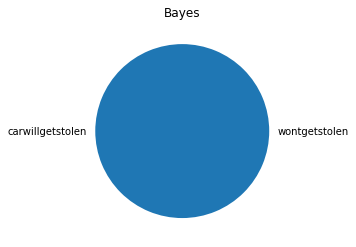

In [41]:
file = "/content/car (2).csv"
temp = pd.read_csv(file)
# pd.read_csv(file) reads the data in the csv
# and stroes in temp


display(temp)
#displays the temp file havind the data now

data=[]
#array to store data in 

fd=csv.reader(open(file))
#file descriptor=using csv reader 

for line in fd:
  data.append(line)
  # for loop, appending lines into the array

# for i in range(0,len(data)):
#   print(data[i])
  # the data now has been entered in to the array data!\\
  #but we do not require the forst row of the data, the headings(color,type etc)
  #so we slice the data[]
DATA=data[1:]
  # sliced array
  # print("lol")
# for i in range(0,len(DATA)):
#     print(DATA[i])



n=len(DATA)
# print(n)
# now we need the number of tiems target attribute is set as yes and no of times it hjas been no

yescount=0
nocount=0
for line in DATA:
  if line[-1]=='yes':
    yescount+=1
  else:
    nocount+=1

# print(yescount)
# print(nocount)
#now to calculate probability of yes
pyes=yescount/n;
#now to calculate probability of no
pno=nocount/n;
# print(pyes,pno)
print("Enter the detials of your new car, color,type and origin:")
x,y,z = input().split()
xyes,xno=Bayes(DATA,x,0,yescount,nocount);
yyes,yno=Bayes(DATA,y,1,yescount,nocount);
zyes,zno=Bayes(DATA,z,2,yescount,nocount);
#results of yes x and no x and other are now available

resyes=xyes*yyes*zyes*pyes
resno=xno*yno*zno
# print(resyes,resno)
peryes=(resyes/(resyes+resno)*100)
perno=(resno/(resno+resyes)*100)
print(peryes,perno)
res=[peryes,perno]
label=["carwillgetstolen","wontgetstolen"]
plt.title("Bayes")
plt.pie(res,labels=label)
plt.show()